# Basit Dogrusal Regresyon

In [49]:
import pandas as pd
import seaborn as sea
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_file = "Advertising.csv"

In [3]:
df = pd.read_csv(data_file, usecols=[1, 2, 3, 4])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().values.any()

False

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


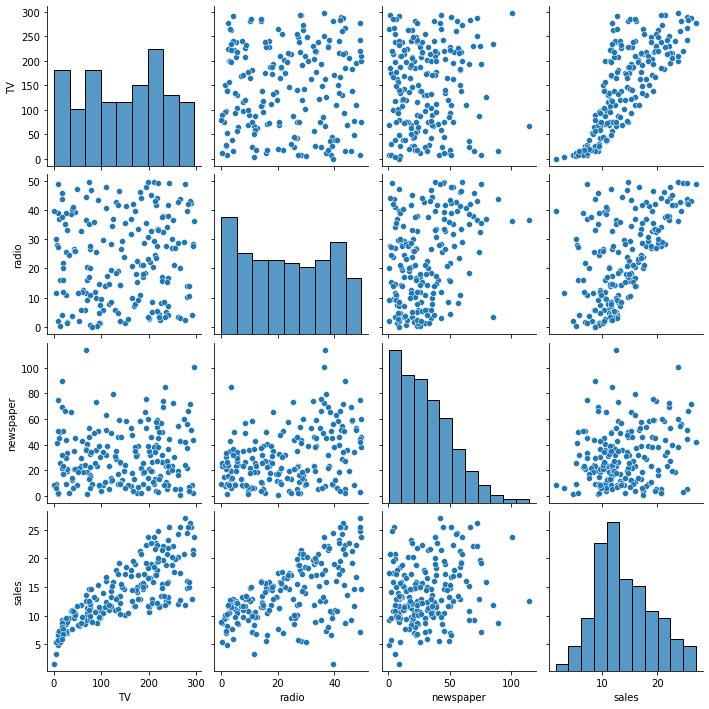

In [10]:
sea.pairplot(df)

In [14]:
smfTV = smf.ols("sales ~ TV", df)
smfTVmodel = smfTV.fit()
smfTVmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        19:19:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
smfTVmodel.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [18]:
# Katsayilarin guven araligi
smfTVmodel.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
# Modelin anlamliligina dair istatistikler
smfTVmodel.f_pvalue

1.467389700194647e-42

In [21]:
# Birim basina hata
smfTVmodel.mse_model

3314.618166868649

In [22]:
# Aciklanabilirlik orani
smfTVmodel.rsquared

0.611875050850071

In [25]:
smfTVmodel.fittedvalues[0:5], df["sales"][0:5]

(0    17.970775
 1     9.147974
 2     7.850224
 3    14.234395
 4    15.627218
 dtype: float64,
 0    22.1
 1    10.4
 2     9.3
 3    18.5
 4    12.9
 Name: sales, dtype: float64)

In [27]:
# Model Denklemi
print("Sales = " + str(smfTVmodel.params[0]) + " + TV * " + str(smfTVmodel.params[1]))

Sales = 7.032593549127693 + TV * 0.04753664043301975


In [15]:
smfRadio = smf.ols("sales ~ radio", df)
smfRadiomodel = smfRadio.fit()
smfRadiomodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           4.35e-19
Time:                        19:19:34   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
smfRadiomodel.params

Intercept    9.311638
radio        0.202496
dtype: float64

In [29]:
# Katsayilarin guven araligi
smfRadiomodel.conf_int()

,0,1
Intercept,8.201588,10.421688
radio,0.162244,0.242747


In [30]:
# Modelin anlamliligina dair istatistikler
smfRadiomodel.f_pvalue

4.35496600176671e-19

In [32]:
# Birim basina hata
smfRadiomodel.mse_model

1798.669200974913

In [33]:
# Aciklanabilirlik orani
smfRadiomodel.rsquared

0.33203245544529547

In [34]:
smfRadiomodel.fittedvalues[0:5], df["sales"][0:5]

(0    16.965979
 1    17.269722
 2    18.606195
 3    17.674714
 4    11.498593
 dtype: float64,
 0    22.1
 1    10.4
 2     9.3
 3    18.5
 4    12.9
 Name: sales, dtype: float64)

In [35]:
# Model Denklemi
print("Sales = " + str(smfRadiomodel.params[0]) + " + radio * " + str(smfRadiomodel.params[1]))

Sales = 9.311638095158278 + radio * 0.20249578339243973


In [16]:
smfNewspaper = smf.ols("sales ~ newspaper", df)
smfNewspapermodel = smfNewspaper.fit()
smfNewspapermodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 14 Jan 2023   Prob (F-statistic):            0.00115
Time:                        19:20:10   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
smfNewspapermodel.params

Intercept    12.351407
newspaper     0.054693
dtype: float64

In [37]:
# Katsayilarin guven araligi
smfNewspapermodel.conf_int()

,0,1
Intercept,11.125956,13.576859
newspaper,0.022005,0.087381


In [38]:
# Modelin anlamliligina dair istatistikler
smfNewspapermodel.f_pvalue

0.0011481958688881913

In [39]:
# Birim basina hata
smfNewspapermodel.mse_model

282.34420588806097

In [40]:
# Aciklanabilirlik orani
smfNewspapermodel.rsquared

0.05212044544430516

In [41]:
smfNewspapermodel.fittedvalues[0:5], df["sales"][0:5]

(0    16.136169
 1    14.818066
 2    16.141639
 3    15.550953
 4    15.545484
 dtype: float64,
 0    22.1
 1    10.4
 2     9.3
 3    18.5
 4    12.9
 Name: sales, dtype: float64)

In [43]:
# Model Denklemi
print("Sales = " + str(smfNewspapermodel.params[0]) + " + newspaper * " + str(smfNewspapermodel.params[1]))

Sales = 12.351407069278167 + newspaper * 0.05469309847227316


In [45]:
params = {'color': 'b', 's': 10}

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'TV Satisi')

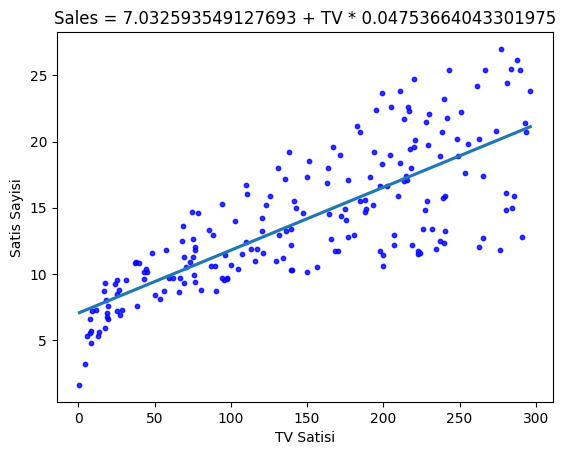

In [46]:
gTV = sea.regplot(df["TV"], df["sales"], ci=None, scatter_kws=params)
gTV.set_title("Sales = " + str(smfTVmodel.params[0]) + " + TV * " + str(smfTVmodel.params[1]))
gTV.set_ylabel("Satis Sayisi")
gTV.set_xlabel("TV Satisi")

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Radyo Satisi')

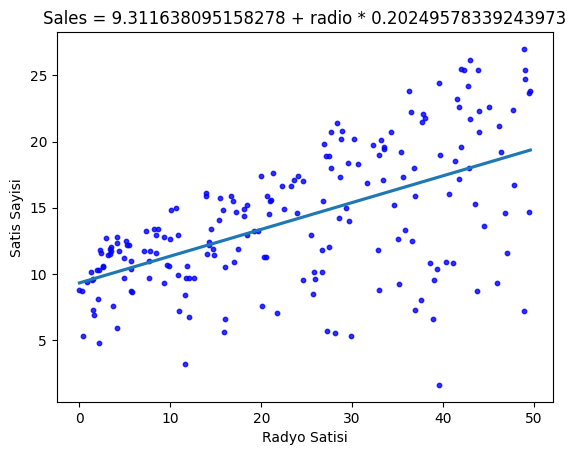

In [47]:
gRadio = sea.regplot(df["radio"], df["sales"], ci=None, scatter_kws=params)
gRadio.set_title("Sales = " + str(smfRadiomodel.params[0]) + " + radio * " + str(smfRadiomodel.params[1]))
gRadio.set_ylabel("Satis Sayisi")
gRadio.set_xlabel("Radyo Satisi")

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Gazete Satisi')

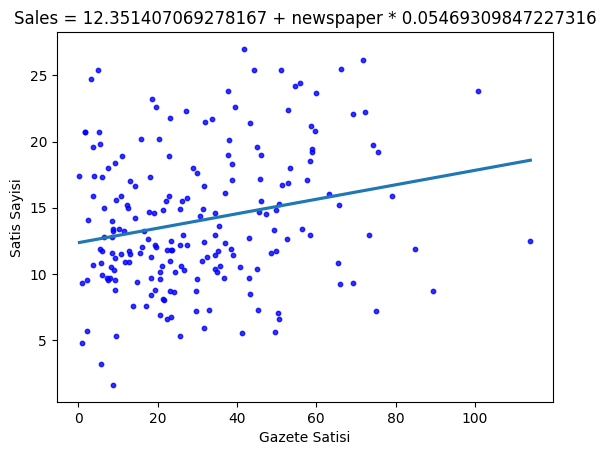

In [48]:
gTV = sea.regplot(df["newspaper"], df["sales"], ci=None, scatter_kws=params)
gTV.set_title("Sales = " + str(smfNewspapermodel.params[0]) + " + newspaper * " + str(smfNewspapermodel.params[1]))
gTV.set_ylabel("Satis Sayisi")
gTV.set_xlabel("Gazete Satisi")

# Tahmin

In [50]:
reg = LinearRegression()

In [55]:
x_tv = df[["TV"]]
y_sales = df["sales"]
LR_model_tv = reg.fit(x_tv, y_sales)
print(LR_model_tv.intercept_)
print(LR_model_tv.coef_)
print("Score: " , LR_model_tv.score(x_tv, y_sales))

7.0325935491276965
[0.04753664]
Score:  0.611875050850071


In [62]:
compTV = pd.DataFrame({"gercek_y": df["sales"][0:10], "tahmin_y": LR_model_tv.predict(x_tv)[0:10]})
compTV["hata"] = compTV["gercek_y"] - compTV["tahmin_y"]
compTV["hata_kare"] = compTV["hata"] ** 2
compTV

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TV
Feature names seen at fit time, yet now missing:
- newspaper

  warnings.warn(message, FutureWarning)


,gercek_y,tahmin_y,hata,hata_kare
0,22.1,24.936289,-2.836289,8.044535
1,10.4,14.785250,-4.385250,19.230417
2,9.3,13.292128,-3.992128,15.937089
3,18.5,20.637411,-2.137411,4.568528
4,12.9,22.239919,-9.339919,87.234092
5,7.2,12.827237,-5.627237,31.665797
6,11.8,15.496260,-3.696260,13.662340
7,13.2,18.925518,-5.725518,32.781551
8,4.8,12.821768,-8.021768,64.348757
9,10.6,23.279088,-12.679088,160.759276


In [56]:
x_radio = df[["radio"]]
y_sales = df["sales"]
LR_model_radio = reg.fit(x_radio, y_sales)
print(LR_model_radio.intercept_)
print(LR_model_radio.coef_)
print("Score: " , LR_model_radio.score(x_radio, y_sales))

9.311638095158283
[0.20249578]
Score:  0.33203245544529525


In [63]:
compRadio = pd.DataFrame({"gercek_y": df["sales"][0:10], "tahmin_y": LR_model_radio.predict(x_radio)[0:10]})
compRadio["hata"] = compRadio["gercek_y"] - compRadio["tahmin_y"]
compRadio["hata_kare"] = compRadio["hata"] ** 2
compRadio

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- radio
Feature names seen at fit time, yet now missing:
- newspaper

  warnings.warn(message, FutureWarning)


,gercek_y,tahmin_y,hata,hata_kare
0,22.1,14.418806,7.681194,59.000738
1,10.4,14.500846,-4.100846,16.816937
2,9.3,14.861820,-5.561820,30.933845
3,18.5,14.610232,3.889768,15.130295
4,12.9,12.942093,-0.042093,0.001772
5,7.2,15.025900,-7.825900,61.244704
6,11.8,14.145341,-2.345341,5.500623
7,13.2,13.423392,-0.223392,0.049904
8,4.8,12.466263,-7.666263,58.771582
9,10.6,12.493609,-1.893609,3.585756


In [57]:
x_newspaper = df[["newspaper"]]
y_sales = df["sales"]
LR_model_newspaper = reg.fit(x_newspaper, y_sales)
print(LR_model_newspaper.intercept_)
print(LR_model_newspaper.coef_)
print("Score: " , LR_model_newspaper.score(x_newspaper, y_sales))

12.351407069278162
[0.0546931]
Score:  0.05212044544430516


In [64]:
compNewspaper = pd.DataFrame({"gercek_y": df["sales"][0:10], "tahmin_y": LR_model_newspaper.predict(x_radio)[0:10]})
compNewspaper["hata"] = compNewspaper["gercek_y"] - compNewspaper["tahmin_y"]
compNewspaper["hata_kare"] = compNewspaper["hata"] ** 2
compNewspaper

/Users/alperkaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- radio
Feature names seen at fit time, yet now missing:
- newspaper

  warnings.warn(message, FutureWarning)


,gercek_y,tahmin_y,hata,hata_kare
0,22.1,14.418806,7.681194,59.000738
1,10.4,14.500846,-4.100846,16.816937
2,9.3,14.861820,-5.561820,30.933845
3,18.5,14.610232,3.889768,15.130295
4,12.9,12.942093,-0.042093,0.001772
5,7.2,15.025900,-7.825900,61.244704
6,11.8,14.145341,-2.345341,5.500623
7,13.2,13.423392,-0.223392,0.049904
8,4.8,12.466263,-7.666263,58.771582
9,10.6,12.493609,-1.893609,3.585756
